In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data3 = pd.read_csv("Market_Basket_Optimisation_27mai.csv", delimiter='\t', header=None)
data3.columns=['items']
data3.head()

,items
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [42]:
data3.shape

(7501, 1)

In [43]:
print(data3.shape)
data3.head()

(7501, 1)


,items
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [44]:
data3["ID"] = [i for i in range(data3.shape[0])]
data3

,items,ID
0,"shrimp,almonds,avocado,vegetables mix,green gr...",0
1,"burgers,meatballs,eggs",1
2,chutney,2
3,"turkey,avocado",3
4,"mineral water,milk,energy bar,whole wheat rice...",4
...,...,...
7496,"butter,light mayo,fresh bread",7496
7497,"burgers,frozen vegetables,eggs,french fries,ma...",7497
7498,chicken,7498
7499,"escalope,green tea",7499


In [73]:
# Step 1
new_df = pd.DataFrame(data3["items"].str.split(',').tolist(), index=data3.ID).stack()
# Step 2
new_df = new_df.reset_index([0, 'ID'])
# Step 3
new_df.columns = ['ID', 'item']
new_df

,ID,item
0,0,shrimp
1,0,almonds
2,0,avocado
3,0,vegetables mix
4,0,green grapes
...,...,...
29358,7499,green tea
29359,7500,eggs
29360,7500,frozen smoothie
29361,7500,yogurt cake


In [75]:
cross_table = pd.crosstab(new_df["ID"], new_df["item"])
cross_table.shape

(7501, 120)

In [76]:
cross_table.head()

item,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
ID,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [77]:
cross_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7501 entries, 0 to 7500
Columns: 120 entries,  asparagus to zucchini
dtypes: int64(120)
memory usage: 6.9 MB


In [86]:
xx = cross_table
xx

item,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
ID,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Choisir les paramètres 
* minimum support, maximum itemset length pour l'algorithme apriori

In [87]:
# Cette fonction est utile pour présenter visuellement le dataset, la distribution de nombre d'article
def meaningful_item_size(tc):
    num_items_per_transaction = pd.Series(tc.sum(axis=1))
    dis_num_items = num_items_per_transaction.value_counts()
    plt.scatter(dis_num_items.index, dis_num_items.values)
    plt.xlabel("Nombre d'articles dans les paniers")
    plt.ylabel("Nombre de transaction correspondant")
    plt.show()
    plt.close()
    return dis_num_items

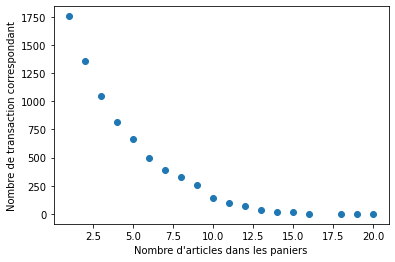

In [88]:
itemset_size = meaningful_item_size(xx)

In [89]:
dis_num_items

0    5
dtype: int64

In [90]:
itemset_size[:15]

1     1754
2     1358
3     1044
4      816
5      665
6      495
7      388
8      327
9      259
10     139
11     102
12      67
13      40
14      22
15      17
dtype: int64

In [91]:
basket_1_item = data3[data3.items_count==1]
singler = basket_1_item['items'].unique()
print(len(singler))
singler

AttributeError: 'DataFrame' object has no attribute 'items_count'

In [22]:
num_basket_one_item = list(itemset_size)[0]
ratio_basket_1_item = round(num_basket_one_item/cross_table.shape[0],3)
print(f"Nous constatons qu'il y a {num_basket_one_item} ou {ratio_basket_1_item} transactions inutiles pour association rules")

Nous constatons qu'il y a 1754 ou 0.234 transactions inutiles pour association rules


* A cause d'une grande quantité (23.4%) de données qui ne contribue pas au règles d'association mais ont un effet sur support, 
* le minimum support ne doit pas être trop grande, mais comment choisir?

In [23]:
choix_min_support = [0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.128]
print("Nombres correspondants:", [int(choix_min_support[i]*cross_table.shape[0]) for i in range(len(choix_min_support))])

Nombres correspondants: [15, 30, 60, 120, 240, 480, 960]


In [24]:
# Cette fonction est utile pour calculer la maximum longueur des datasets fréquentes
def max_length(ovc, value):
    result, ordered_value_count_distribution = 0, ovc
    for i in ordered_value_count_distribution.index:
        if ordered_value_count_distribution[i] < value:
            return i-1
        elif ordered_value_count_distribution[i] == value:
            return i

In [25]:
num_min_support = [int(choix_min_support[i]*cross_table.shape[0]) for i in range(len(choix_min_support))]
max_item_len = pd.Series(num_min_support).map(lambda x: max_length(itemset_size,x))
print(list(max_item_len))

[15, 13, 12, 10, 9, 6, 3]


In [26]:
pd.DataFrame({'minsup':choix_min_support, 'num_rec':num_min_support, 'max_len':max_item_len})

,minsup,num_rec,max_len
0,0.002,15,15
1,0.004,30,13
2,0.008,60,12
3,0.016,120,10
4,0.032,240,9
5,0.064,480,6
6,0.128,960,3


* On constate qu'avec faible minimum support, 0.002, correspondant à 15 enregistrements au minimum, la max_len est 15
* Avec forte minimum support, 0.128, correspondant à 960 enregistrements au minimum, la max_len est 3. En consequence, 
* avec faible ou moyen minsup, on aura besoin possiblement choisir max_len pour limiter trop de regles, 9 par exemple.

# Premier étape: trouver les itemset_fréquent avec apriori

In [27]:
from mlxtend.frequent_patterns import apriori

In [28]:
num_freq_itemset, freq_itemsets = [], []
for minsup in choix_min_support:
    freq_items = apriori(cross_table, min_support=minsup, max_len=9, use_colnames=True)
    freq_itemsets.append(freq_items)
    num_freq_itemset.append(freq_items.shape[0])
result_df = pd.DataFrame({'minsup':choix_min_support, 'num_items': num_freq_itemset, 'itemsets':freq_itemsets})
result_df[['minsup','num_items']]

,minsup,num_items
0,0.002,2435
1,0.004,959
2,0.008,350
3,0.016,142
4,0.032,49
5,0.064,18
6,0.128,7


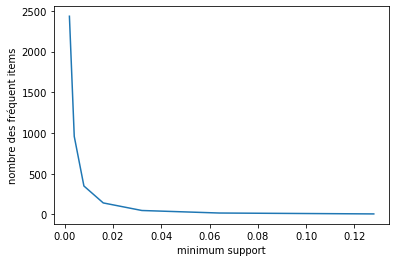

In [29]:
plt.plot(result_df.minsup, result_df.num_items)
plt.xlabel("minimum support")
plt.ylabel("nombre des fréquent items")
plt.show()

# Deuxième étape: trouver les association avec association_rules

In [30]:
from mlxtend.frequent_patterns import association_rules

In [31]:
# initialise un petit seuil de confiance 10% afin de trouver maximum de règles
num_rules, rules, min_conf = [], [], 0.1
for f_items in freq_itemsets:
    ar = association_rules(f_items, metric='confidence', min_threshold=min_conf)
    rules.append(ar.sort_values(by='lift', ascending=False))
    num_rules.append(ar.shape[0])
result_df['num_rules'] = num_rules     
result_df['rules'] = rules
result_df[['minsup','num_items', 'num_rules']]

,minsup,num_items,num_rules
0,0.002,2435,4817
1,0.004,959,1510
2,0.008,350,457
3,0.016,142,151
4,0.032,49,32
5,0.064,18,0
6,0.128,7,0


In [32]:
col_display = ["antecedents","consequents","confidence","lift"]
print("Les premiers 5 regles plus importantes")
for idx in range(5):   # seulement les premier 5 minsup portent des règles
    print("="*60)
    print("-"*20, f"min_support = {result_df.minsup[idx]}", "-"*20)
    print(result_df.rules[idx][col_display].head())

Les premiers 5 regles plus importantes
-------------------- min_support = 0.002 --------------------
                           antecedents                       consequents  \
2680  (mushroom cream sauce, escalope)                           (pasta)   
2684                           (pasta)  (mushroom cream sauce, escalope)   
2682                 (escalope, pasta)            (mushroom cream sauce)   
2683            (mushroom cream sauce)                 (escalope, pasta)   
2681     (mushroom cream sauce, pasta)                        (escalope)   

      confidence       lift  
2680    0.441860  28.088096  
2684    0.161017  28.088096  
2682    0.431818  22.650826  
2683    0.132867  22.650826  
2681    0.950000  11.976387  
-------------------- min_support = 0.004 --------------------
                           antecedents                 consequents  \
144                      (light cream)                   (chicken)   
301                            (pasta)                  (esc

# Analyse des résultats
* Rôle de minimum support 

# Ne pas mettre le minimum support trop grand
* On aura seulement des itemsets d'un seul article et il n'y aura plus de regle

In [33]:
result_df.loc[5:6,['minsup','num_items', 'num_rules']]

,minsup,num_items,num_rules
5,0.064,18,0
6,0.128,7,0


* La raison est que tous les itemsets fréquents sont de un seul item

In [34]:
result_df.loc[5, 'itemsets']

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.163845,(chocolate)
3,0.080389,(cookies)
4,0.179709,(eggs)
5,0.079323,(escalope)
6,0.170911,(french fries)
7,0.095321,(frozen vegetables)
8,0.132116,(green tea)
9,0.098254,(ground beef)


In [35]:
result_df.loc[6, 'itemsets']

,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.132116,(green tea)
4,0.129583,(milk)
5,0.238368,(mineral water)
6,0.174110,(spaghetti)


# Les minsup un peu moins grande

In [36]:
result_df.loc[3:4,['minsup','num_items', 'num_rules']]

,minsup,num_items,num_rules
3,0.016,142,151
4,0.032,49,32


In [37]:
col_display = ["antecedents","consequents","confidence","lift"]
print("Toutes les regles")
for idx in range(3,5):
    print("="*60)
    print("-"*20, f"min_support = {result_df.minsup[idx]}", "-"*20)
    print(result_df.rules[idx][col_display])

Toutes les regles
-------------------- min_support = 0.016 --------------------
                    antecedents                 consequents  confidence  \
150               (ground beef)  (mineral water, spaghetti)    0.173677   
149  (mineral water, spaghetti)               (ground beef)    0.285714   
94                   (tomatoes)         (frozen vegetables)    0.235867   
93          (frozen vegetables)                  (tomatoes)    0.169231   
89                     (shrimp)         (frozen vegetables)    0.233209   
..                          ...                         ...         ...   
81                  (spaghetti)              (french fries)    0.158499   
80               (french fries)                 (spaghetti)    0.161466   
69                   (escalope)             (mineral water)    0.215126   
77              (mineral water)              (french fries)    0.141499   
76               (french fries)             (mineral water)    0.197348   

         lift  
150

# Mettre le minimum support le plus petit que possible
* On rammasse beaucoup de règles avec plusieurs items dans les conséquents
* Cependant, on peut mettre un filter pour éliminer ces règles

In [38]:
result_df.loc[0:1,['minsup','num_items', 'num_rules']]

,minsup,num_items,num_rules
0,0.002,2435,4817
1,0.004,959,1510


In [39]:
col_display = ["antecedents","consequents","confidence","lift"]
print("Toutes les regles")
for idx in range(2):
    print("="*60)
    print("-"*20, f"min_support = {result_df.minsup[idx]}", "-"*20)
    print(result_df.rules[idx][col_display])

Toutes les regles
-------------------- min_support = 0.002 --------------------
                           antecedents                       consequents  \
2680  (mushroom cream sauce, escalope)                           (pasta)   
2684                           (pasta)  (mushroom cream sauce, escalope)   
2682                 (escalope, pasta)            (mushroom cream sauce)   
2683            (mushroom cream sauce)                 (escalope, pasta)   
2681     (mushroom cream sauce, pasta)                        (escalope)   
...                                ...                               ...   
2846           (shrimp, mineral water)                    (french fries)   
885             (mushroom cream sauce)                   (mineral water)   
424                         (hot dogs)                            (eggs)   
893                            (pasta)                   (mineral water)   
159                           (butter)                   (mineral water)   

      c

In [40]:
result_df.loc[0, 'rules'].shape

(4817, 9)

In [41]:
result_df.loc[0, 'rules'].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2680,"(mushroom cream sauce, escalope)",(pasta),0.005733,0.015731,0.002533,0.441860,28.088096,0.002443,1.763482
2684,(pasta),"(mushroom cream sauce, escalope)",0.015731,0.005733,0.002533,0.161017,28.088096,0.002443,1.185086
2682,"(escalope, pasta)",(mushroom cream sauce),0.005866,0.019064,0.002533,0.431818,22.650826,0.002421,1.726447
2683,(mushroom cream sauce),"(escalope, pasta)",0.019064,0.005866,0.002533,0.132867,22.650826,0.002421,1.146461
2681,"(mushroom cream sauce, pasta)",(escalope),0.002666,0.079323,0.002533,0.950000,11.976387,0.002321,18.413545


In [42]:
# Ces fonctions sont utiles pour filter des règles peu désirables 
def not_commun_items(x):
    commun_items = ['spaghetti', 'mineral water', 'eggs', 'milk']
    for item in commun_items:
        if {item}.issubset(x):
            return False
    return True

def one_item_consequents(x):
    return len(list(x)) == 1

def my_filters(df, min_lift=2.0, min_conf=0.5):
    df['one_item'] = df.consequents.map(lambda x: one_item_consequents(x))
    df['ncommun'] = df.consequents.map(lambda x: not_commun_items(x))
    return df[(df.lift>=min_lift) & (df.confidence>=min_conf) & (df.ncommun) & (df.one_item)]

In [43]:
def display_result(idx, df, min_lift=2.0, min_conf=0.5):
    new_df = my_filters(df.loc[idx,'rules'], min_lift=min_lift, min_conf=min_conf)
    print('='*80)
    print(f"Trouve {new_df.shape[0]} règles pour minimum support {df.loc[idx,'minsup']}")
    print('-'*45)
    new_df = new_df.rename(columns={'support':'sup', 'confidence':'conf'})
    print(new_df[['antecedents', 'consequents', 'sup', 'conf', 'lift']].round({'sup':3,'conf':2, 'lift':1}))

In [46]:
suitable_confiance = [0.65, 0.35, 0.20, 0.2, 0.15]
for i in range(len(suitable_confiance)):
    display_result(i, result_df, min_conf=suitable_confiance[i])

Trouve 2 règles pour minimum support 0.002
---------------------------------------------
                        antecedents          consequents    sup  conf  lift
2681  (mushroom cream sauce, pasta)           (escalope)  0.003  0.95  12.0
3179    (tomatoes, parmesan cheese)  (frozen vegetables)  0.002  0.67   7.0
Trouve 11 règles pour minimum support 0.004
---------------------------------------------
                                        antecedents     consequents    sup  \
301                                         (pasta)      (escalope)  0.006   
1269                     (herb & pepper, spaghetti)   (ground beef)  0.006   
1264                 (herb & pepper, mineral water)   (ground beef)  0.007   
477                                  (tomato sauce)   (ground beef)  0.005   
1486  (frozen vegetables, mineral water, spaghetti)   (ground beef)  0.004   
970                         (french fries, cookies)     (green tea)  0.005   
801                             (cooking oil, e

# Des règles particulièrement intéressantes
* Les règles trouvées avec faible minsup (0.002 et 0.004) semblent plus intéressantes 

    * (mushroom cream sauce, pasta) ==>  (escalope)
    * support = 0.02533
    * confiance = 0.9500
    * lift = 11.9764

* Une règle intéressante est trouvé avec minsup 0.032, mais cette règle est bien trop évident pour appliquer IA.
* spaghetti ==> ground beef
* support = 0.039
* confiance = 0.23
* lift = 2.3

In [202]:
num_freq_itemset, itemset = [], []
for min_support in ma_min_support:
    freq_items = apriori(cross_table, min_support=min_support, max_len=5, use_colnames=True)
    itemset.append(freq_items)
    num_freq_itemset.append(freq_items.shape[0])
result_df = pd.DataFrame({'min_support':ma_min_support, 'num_freq_items': num_freq_itemset})
result_df

,min_support,num_freq_items
0,0.002,2435
1,0.004,959
2,0.008,350
3,0.016,142
4,0.032,49


In [203]:
num_rules, rules = [], []
for freq_items in itemset:
    r = association_rules(freq_items, metric='confidence', min_threshold=0.2)
    rules.append(r.sort_values(by='lift', ascending=False))
    num_rules.append(r.shape[0])
result_df['num_rules'] = num_rules     # pd.DataFrame({'min_support':ma_min_support, 'num_rules': num_rules})
result_df

,min_support,num_freq_items,num_rules
0,0.002,2435,2569
1,0.004,959,811
2,0.008,350,235
3,0.016,142,84
4,0.032,49,25


In [ ]:
col_display = ["antecedents","consequents","lift"]
print("Les premiers 20 regles plus importantes")
for idx in range(len(ma_min_support)):
    print("="*60)
    print("-"*20, f"min_support = {result_df.min_support[idx]}", "-"*20)
    print(rules[idx][col_display].head(20))

In [185]:
rules[5].sort_values(by='lift',ascending=False, inplace=True)
print("Nombre de regles trouve lorsque le minimum support est grande : ", num_rules[5])
rules[5].head()

Nombre de regles trouve lorsque le minimum support est grande :  27


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716
19,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
17,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
15,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
22,(spaghetti),(milk),0.174110,0.129583,0.035462,0.203675,1.571779,0.012900,1.093043


In [186]:
rules[0].sort_values(by='lift',ascending=False, inplace=True)
print("Nombre de regles trouve lorsque le minimum support est petite : ", num_rules[0])
rules[0].head()

Nombre de regles trouve lorsque le minimum support est grande :  597


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
108,(pasta),(escalope),0.015731,0.079323,0.005866,0.372881,4.700812,0.004618,1.468107
208,(pasta),(shrimp),0.015731,0.071457,0.005066,0.322034,4.506672,0.003942,1.369601
205,(whole wheat pasta),(olive oil),0.029463,0.065858,0.007999,0.271493,4.122410,0.006059,1.282270
521,"(herb & pepper, spaghetti)",(ground beef),0.016264,0.098254,0.006399,0.393443,4.004360,0.004801,1.486663
519,"(herb & pepper, mineral water)",(ground beef),0.017064,0.098254,0.006666,0.390625,3.975683,0.004989,1.479789


In [127]:
# On voit par cette figure qu'il y a une coudre vers 10 articles et 150 transactions
print("minimum support sera", round(150/cross_table.shape[0], 3))

minimum support sera 0.02


In [128]:
freq_items = apriori(cross_table, min_support=0.02, max_len=10, use_colnames=True)
freq_items.shape

(103, 2)

In [129]:
freq_items.sort_values(by='support', ascending=False, inplace=True)
freq_items.head(50)

,support,itemsets
34,0.238368,(mineral water)
13,0.179709,(eggs)
44,0.174110,(spaghetti)
17,0.170911,(french fries)
9,0.163845,(chocolate)
24,0.132116,(green tea)
33,0.129583,(milk)
25,0.098254,(ground beef)
22,0.095321,(frozen vegetables)
38,0.095054,(pancakes)


In [130]:
freq_items.tail(53)

,support,itemsets
84,0.031063,"(mineral water, green tea)"
71,0.030796,"(milk, eggs)"
46,0.030396,(tomato juice)
4,0.030129,(butter)
50,0.029463,(whole wheat pasta)
53,0.028796,"(eggs, burgers)"
75,0.028530,"(green tea, french fries)"
40,0.028130,(red wine)
83,0.027863,"(spaghetti, frozen vegetables)"
79,0.027596,"(spaghetti, french fries)"


# GENERATION DE REGLES D’ASSOCIATION

In [131]:
rules = association_rules(freq_items, metric='confidence', min_threshold=0.2)
rules.shape

(55, 9)

In [132]:
rules.sort_values(by='lift', ascending=False, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716
10,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
41,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048
39,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
37,(frozen vegetables),(milk),0.095321,0.129583,0.023597,0.247552,1.910382,0.011245,1.156781
27,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818
30,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962
50,(tomatoes),(spaghetti),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117
8,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
44,(ground beef),(milk),0.098254,0.129583,0.021997,0.223881,1.727704,0.009265,1.121499


In [133]:
# l'eau minerale, des oeufs, des spaghetti, des frites, de boeuf hache sont les plus vendu dans ce dossier
# mais les regles d'association ne sont pas trop fortes 

In [136]:
spaghetti_consequents_id = np.where(rules.consequents.apply(lambda x: {'spaghetti'}.issubset(x)))
rules.iloc[spaghetti_consequents_id]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(ground beef),(spaghetti),0.098254,0.17411,0.039195,0.398915,2.291162,0.022088,1.373997
41,(olive oil),(spaghetti),0.065858,0.17411,0.022930,0.348178,1.999758,0.011464,1.267048
50,(tomatoes),(spaghetti),0.068391,0.17411,0.020931,0.306043,1.757755,0.009023,1.190117
49,(shrimp),(spaghetti),0.071457,0.17411,0.021197,0.296642,1.703760,0.008756,1.174209
29,(frozen vegetables),(spaghetti),0.095321,0.17411,0.027863,0.292308,1.678867,0.011267,1.167018
19,(milk),(spaghetti),0.129583,0.17411,0.035462,0.273663,1.571779,0.012900,1.137061
33,(pancakes),(spaghetti),0.095054,0.17411,0.025197,0.265077,1.522468,0.008647,1.123778
1,(mineral water),(spaghetti),0.238368,0.17411,0.059725,0.250559,1.439085,0.018223,1.102008
48,(burgers),(spaghetti),0.087188,0.17411,0.021464,0.246177,1.413918,0.006283,1.095602
11,(chocolate),(spaghetti),0.163845,0.17411,0.039195,0.239219,1.373952,0.010668,1.085581


In [141]:
print("Les 5 premier antecedents pour spaghetti comme consequent sont:")
rules.iloc[spaghetti_consequents_id][:5]["antecedents"]

Les 5 premier antecedents pour spaghetti comme consequent sont:


10          (ground beef)
41            (olive oil)
50             (tomatoes)
49               (shrimp)
29    (frozen vegetables)
Name: antecedents, dtype: object

In [148]:
egg_consequents_id = np.where(rules.consequents.apply(lambda x: {'eggs'}.issubset(x)))
rules.iloc[egg_consequents_id]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818
26,(milk),(eggs),0.129583,0.179709,0.030796,0.237654,1.322437,0.007509,1.076009
46,(pancakes),(eggs),0.095054,0.179709,0.021730,0.228612,1.272118,0.004648,1.063395
47,(frozen vegetables),(eggs),0.095321,0.179709,0.021730,0.227972,1.268559,0.004600,1.062514
4,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
16,(french fries),(eggs),0.170911,0.179709,0.036395,0.212949,1.184961,0.005681,1.042232
13,(spaghetti),(eggs),0.174110,0.179709,0.036528,0.209801,1.167446,0.005239,1.038081
23,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711


In [149]:
print("Les 5 premier antecedents pour des oeufs comme consequent sont:")
rules.iloc[egg_consequents_id][:5]["antecedents"]

Les 5 premier antecedents pour des oeufs comme consequent sont:


27              (burgers)
26                 (milk)
46             (pancakes)
47    (frozen vegetables)
4         (mineral water)
Name: antecedents, dtype: object

In [150]:
choco_consequents_id = np.where(rules.consequents.apply(lambda x: {'chocolate'}.issubset(x)))
rules.iloc[choco_consequents_id]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823
42,(frozen vegetables),(chocolate),0.095321,0.163845,0.022930,0.240559,1.468215,0.007312,1.101015
40,(ground beef),(chocolate),0.098254,0.163845,0.023064,0.234735,1.432669,0.006965,1.092635
12,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,0.010668,1.079070
3,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
21,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827


In [151]:
print("Les 5 premier antecedents pour chocolat comme consequent sont:")
rules.iloc[choco_consequents_id][:5]["antecedents"]

Les 5 premier antecedents pour chocolat comme consequent sont:


24                 (milk)
42    (frozen vegetables)
40          (ground beef)
12            (spaghetti)
3         (mineral water)
Name: antecedents, dtype: object

In [152]:
beuf_consequents_id = np.where(rules.consequents.apply(lambda x: {'ground beef'}.issubset(x)))
rules.iloc[beuf_consequents_id]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(spaghetti),(ground beef),0.17411,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716


* On voit que boeuf hanche est associe assez fortement avec les spaghetti  